In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
def plotar_imagem(imagem, titulo=None):
    plt.figure(figsize=(2.5,2.5))
    plt.imshow(imagem)
    if titulo:
        plt.title(titulo)
    plt.show()

def desenhar_bordas(color):
    # desenhando a borda da moeda
    cv2.circle(color,(i[0],i[1]),i[2],(0,255,0),2)
    # desenha o centro da moeda
    cv2.circle(color,(i[0],i[1]),2,(0,0,255),3)

def polar2x(img):
    dim = img.shape
    nimg = np.zeros((dim[0]*2,dim[1],3), np.uint8)
    print(dim)
    nimg[0:dim[0]:][0:dim[1]:] = img[0:dim[0]:][0:dim[1]:] 
    nimg[dim[0]:2*dim[0]:][0:dim[1]:] = img[0:dim[0]:][0:dim[1]:]
    return nimg

def rotacionar(img, teta):
    centro = tuple(np.array(img.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(centro, teta, 1.0)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], borderValue = (255,255,255), flags=cv2.INTER_LINEAR)
    return result

In [3]:
diretorio = 'C:\\Users\\giova\\Desktop\\TCC\\img\\'

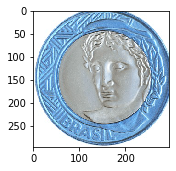

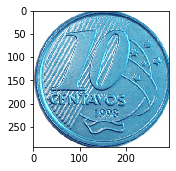

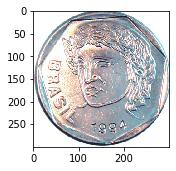

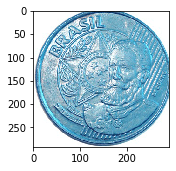

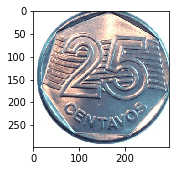

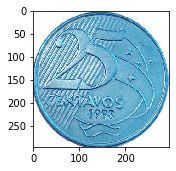

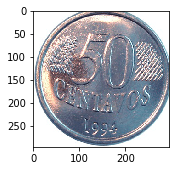

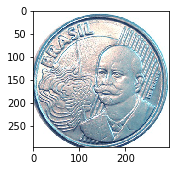

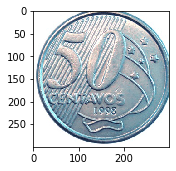

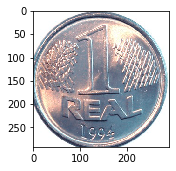

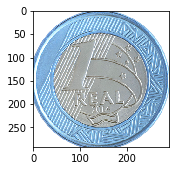

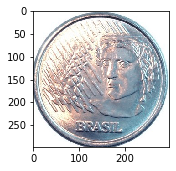

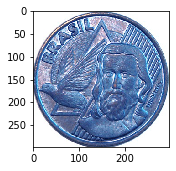

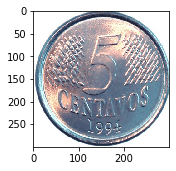

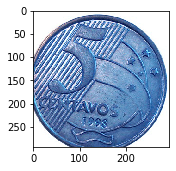

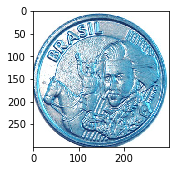

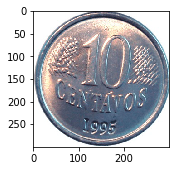

In [4]:
for files in os.listdir(diretorio):
    color = np.zeros((1,1))
    gray = np.zeros((1,1))
    #preto e braco
    gray = cv2.imread(diretorio+files,0)
    #colorida
    color = cv2.imread(diretorio+files,1)
    #arrumando falhas na imagem aplicando gaussian blur
    gray_blur = cv2.GaussianBlur(gray, (15,15), 0)
    thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11,1)
    #Preenchendo as prováveis regiões de circulos com operadores morfológicos
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=7)
    #encontrando os contornos dos circulos com a transformada hough
    circles = cv2.HoughCircles(closing,cv2.HOUGH_GRADIENT,1, 150, 300 , 50 , 15, 0)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        mask = np.full((i[2],i[2],3), 255)
        mask = color[i[0]-i[2]:i[0]+i[2], i[1]-i[2]:i[1]+i[2]]
        plotar_imagem(mask)
        coin_polar = cv2.linearPolar(color,(i[0],i[1]), i[2], cv2.WARP_FILL_OUTLIERS)
        #coin_after = cv2.linearPolar(coin_polar, (i[0],i[1]), i[2],cv2.WARP_INVERSE_MAP)
        coin_polar_r = cv2.resize(coin_polar, (128,128), interpolation = cv2.INTER_AREA)
        cv2.imwrite('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Polar\\'+files, coin_polar_r)
        for j in range(1,359):
            rot = rotacionar(mask, j)
            rot_r = cv2.resize(rot, (128,128), interpolation = cv2.INTER_AREA)
            filename = files.split(".")
            cv2.imwrite('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Normal\\'+filename[0]+"_"+str(j)+"."+filename[1], rot_r)
    

## Transformando em Array NP e salvando em arquivo

Preparando os conjuntos de teste e validação
Validação

In [5]:
x_train = []
y_train = []
for file in os.listdir('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Normal\\'):
    img = cv2.imread('C:\\Users\\giova\\Desktop\\TCC\\Dataset\\Normal\\' + file)
    x_train.append(img)
    img_nome = file.split("_")
    y_train.append(img_nome[0])
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(6086, 128, 128, 3)
(6086,)


Validação

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, stratify=y_train)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(4260, 128, 128, 3)
(1826, 128, 128, 3)
(4260,)
(1826,)


Teste

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train)
print(x_train.shape[1:])
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(128, 128, 3)
(426, 128, 128, 3)
(3834,)
(426,)


In [8]:
np.savez("coins.npz", x_train=x_train, x_val=x_val, x_test=x_test, y_train=y_train, y_val=y_val, y_test=y_test)